In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import env
import os

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.


In [2]:
def get_zillow_data():
    '''
    function pulls zillow data from the MySQL Codeup db into a dataframe.
    '''
    url = env.get_db_url('zillow')
    query = '''
    select bedroomcnt, bathroomcnt,calculatedfinishedsquarefeet, taxvaluedollarcnt,
	yearbuilt, taxamount, fips from properties_2017
    join propertylandusetype using (propertylandusetypeid)
    where propertylandusedesc in ('Single Family Residential');
    '''
    
    filename = 'zillow.csv'

    #call the check_file_exists fuction 
    df = check_file_exists(filename, query, url)
    return df

def check_file_exists(filename, query, url):
    '''
    checks if file already exists.
    '''
    if os.path.exists(filename):
        print('this file exists, reading csv')
        df = pd.read_csv(filename, index_col=0)
    else:
        print('this file doesnt exist, read from sql, and export to csv')
        df = pd.read_sql(query, url)
        df.to_csv(filename)
        
    return df

In [3]:
df = get_zillow_data()

this file exists, reading csv


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.


In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
df.shape

(2152863, 7)

In [6]:
df.size

15070041

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


- all columns are float dtypes
- my target variable is taxvaluedollarcnt
- each row is a property with how much it cost including tax, the amount of bedrooms, bathrooms, square feet, year built, taxes, and it's fips code which is state and county code

In [8]:
#checking value counts for fips column
df.fips.value_counts()

fips
6037.0    1431811
6059.0     555077
6111.0     165975
Name: count, dtype: int64

In [9]:
#checking null counts
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [10]:
#dropping all null
df = df.dropna()

In [11]:
#verifying null count
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


changed the datatypes of the 3 columns below from floats

In [13]:
#changed calculatedfinishedsquarefeet datatype to int
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)

In [14]:
#changed yearbuilt datatype to int
df.yearbuilt = df.yearbuilt.astype(int)

In [15]:
#changed fips datatype to object because it is a state and county code
df.fips = df.fips.astype(object)

In [16]:
#verifying datatypes after change
df.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt               float64
yearbuilt                         int64
taxamount                       float64
fips                             object
dtype: object

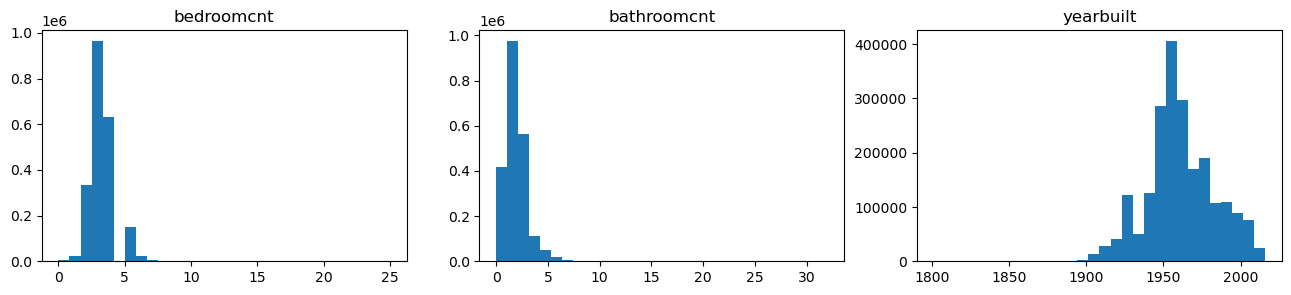

In [17]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'yearbuilt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,3, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=30)

    # Hide gridlines.
    plt.grid(False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.6+ MB


In [19]:
#renamed columns
df.rename(columns={df.columns[0]: 'bedrooms', df.columns[1]: 'bathrooms', df.columns[2]: 'square_feet',\
                   df.columns[3]: 'home_value', df.columns[5]: 'tax'})

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037.0
6,3.0,4.0,1620,847770.0,2011,10244.94,6037.0
7,3.0,2.0,2077,646760.0,1926,7924.68,6037.0
11,0.0,0.0,1200,5328.0,1972,91.60,6037.0
14,0.0,0.0,171,6920.0,1973,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375,422400.0,2015,13877.56,6037.0
2152858,4.0,3.0,2262,960756.0,2015,13494.52,6059.0
2152859,4.0,4.5,3127,536061.0,2014,6244.16,6059.0
2152861,3.0,2.5,1974,424353.0,2015,5302.70,6059.0


3. Write a function to split your data into train, validate, and test.


In [20]:
def splitting_data(df):
    '''
    Takes in a df and a column (target variable) and splits into df, validate and test. 
    Ex: df, validate, test = prepare_telco.splitting_data(df, 'churn')
    '''

    #first split
    train, validate_test = train_test_split(df,
                     train_size=0.6,
                     random_state=123
                    )
    
    #second split
    validate, test = train_test_split(validate_test,
                                     train_size=0.5,
                                      random_state=123
                        )
    return train, validate, test

4. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [23]:
def get_connection_url(db, user=env.user, host=env.host, password=env.password):
    """
    This function takes in 1 positional arguement and checks for username, host, and password credentials from imported env module. 
    Returns a formatted connection url to access mySQL database.
    """
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    

def check_file_exists(filename, query, url):
    '''
    checks if file already exists.
    '''
    if os.path.exists(filename):
        print('this file exists, reading csv')
        df = pd.read_csv(filename, index_col=0)
    else:
        print('this file doesnt exist, read from sql, and export to csv')
        df = pd.read_sql(query, url)
        df.to_csv(filename)
        
    return df


def get_zillow_data():
    '''
    function pulls zillow data from the MySQL Codeup db into a dataframe.
    '''
    url = env.get_db_url('zillow')
    query = '''
    select bedroomcnt, bathroomcnt,calculatedfinishedsquarefeet, taxvaluedollarcnt,
	yearbuilt, taxamount, fips from properties_2017
    join propertylandusetype using (propertylandusetypeid)
    where propertylandusedesc in ('Single Family Residential');
    '''
    
    filename = 'zillow.csv'

    #call the check_file_exists fuction 
    df = check_file_exists(filename, query, url)
    return df

def prep_zillow(df):
    
    #drop all nulls
    df = df.dropna()
    
    #change datatype of  exam1 and exam3 to integers
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
    df.bedroomcnt = df.bedroomcnt.astype(int)
    df.yearbuilt = df.yearbuilt.astype(int)
    df.fips = df.fips.astype(int)
    
    #rename columns
    df = df.rename(columns={df.columns[0]: 'bedrooms', df.columns[1]: 'bathrooms', df.columns[2]: 'square_feet',\
                   df.columns[3]: 'home_value', df.columns[5]: 'tax', df.columns[6]: 'county'})
    
    df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})
    
    return df

def splitting_data(df):
    '''
    Takes in a df and a column (target variable) and splits into df, validate and test. 
    Ex: df, validate, test = prepare_telco.splitting_data(df, 'churn')
    '''

    #first split
    train, validate_test = train_test_split(df,
                     train_size=0.6,
                     random_state=123
                    )
    
    #second split
    validate, test = train_test_split(validate_test,
                                     train_size=0.5,
                                      random_state=123
                        )
    return train, validate, test


def wrangle_zillow():
    train, validate, test=splitting_data(prep_zillow(get_zillow_data()))    
    return train, validate, test

In [24]:
train, validate, test = wrangle_zillow()

this file exists, reading csv


In [25]:
train.head()

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,county
462820,5,4.0,3011,710674.0,2005,7561.14,Ventura
3880,3,2.0,1682,603333.0,1961,7086.19,LA
992263,4,2.0,1433,82804.0,1954,1134.83,LA
311722,3,2.5,2001,355444.0,1999,4174.92,Ventura
787985,4,2.0,2277,571000.0,1962,7113.02,LA


In [26]:
train.dtypes

bedrooms         int64
bathrooms      float64
square_feet      int64
home_value     float64
yearbuilt        int64
tax            float64
county          object
dtype: object